In [6]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Establish connection with database
cnxn = pyodbc.connect(Driver='{SQL Server}',Server='AAJ',Database='TrainingDB',Trusted_Connection='yes')
cursor = cnxn.cursor()

In [38]:
# Flights Going to every state
query = "SELECT top 10 sa.State, COUNT(*) as 'NumberofRunningFlights' from dbo.Sat_Flight1 sf1 inner join dbo.Link_Flight_Airport1 lfa on sf1.[Hub Flight Hash Key] = lfa.[Hub Flight Hash Key] inner join dbo.SAT_AIRPORT sa on sa.[Hub Airport Hash Key] = lfa.[Hub Airport Hash Key] inner join dbo.Hub_Airport ha on ha.[Hub Airport Hash Key] = sa.[Hub Airport Hash Key] inner join dbo.Hub_Flight1 hf1 on hf1.[Hub Flight Hash Key] = sf1.[Hub Flight Hash Key] where ha.IATA_Code = sf1.Destination_Airport Group by sa.State" 
print("State wise Flights:\n")
df = pd.read_sql(query, cnxn)
print(df)

State wise Flights:

  State  NumberofRunningFlights
0    OR                       9
1    IA                       1
2    TN                       2
3    ID                       1
4    MA                      17
5    MN                      33
6    SC                       2
7    WY                       1
8    AK                       4
9    HI                      20


C:\Users\aajos\miniconda3\envs\myenv\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<AxesSubplot:xlabel='State'>

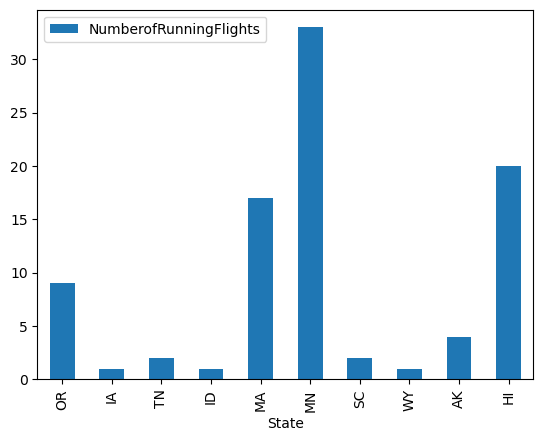

In [39]:
df.plot(x="State", y="NumberofRunningFlights", kind="bar")

In [43]:
# Airlines with Maximum number of Flights
query = "SELECT trim(hf1.Airline_Code) as Airline_Code, COUNT(*) as NumberofRunningFlights from dbo.Sat_Flight1 sf1 inner join dbo.Link_Flight_Airport1 lfa on sf1.[Hub Flight Hash Key] = lfa.[Hub Flight Hash Key] inner join dbo.SAT_AIRPORT sa on sa.[Hub Airport Hash Key] = lfa.[Hub Airport Hash Key] inner join dbo.Hub_Airport ha on ha.[Hub Airport Hash Key] = sa.[Hub Airport Hash Key] inner join dbo.Hub_Flight1 hf1 on hf1.[Hub Flight Hash Key] = sf1.[Hub Flight Hash Key] where ha.IATA_Code = sf1.Destination_Airport Group by hf1.Airline_Code order by NumberofRunningFlights desc" 
print("Airline Code wise Flights:\n")
df1 = pd.read_sql(query, cnxn)
print(df1)
    

Airline Code wise Flights:



C:\Users\aajos\miniconda3\envs\myenv\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


   Airline_Code  NumberofRunningFlights
0            AA                     135
1            OO                     121
2            DL                     118
3            UA                     103
4            B6                      91
5            EV                      80
6            WN                      72
7            MQ                      68
8            AS                      60
9            US                      59
10           NK                      44
11           F9                      34
12           HA                      17
13           VX                       4


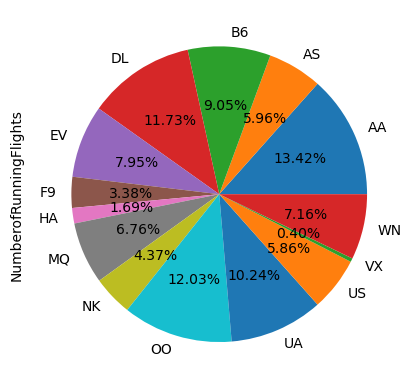

In [44]:

df1.groupby(['Airline_Code']).sum().plot(kind='pie',y='NumberofRunningFlights', legend = None, autopct = lambda p:f'{p:.2f}%'
)
plt.show()





In [48]:
query = "SELECT top 10 State, Count(*) as 'NumberofInternationalAirports' from dbo.SAT_AIRPORT where AirportName like '%International%' group by State"
df2 = pd.read_sql(query, cnxn)
print(df2)


  State  NumberofInternationalAirports
0    AK                              4
1    AL                              2
2    AS                              1
3    AZ                              3
4    CA                              9
5    CO                              1
6    CT                              1
7    FL                             14
8    GA                              2
9    GU                              1


C:\Users\aajos\miniconda3\envs\myenv\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<AxesSubplot:ylabel='State'>

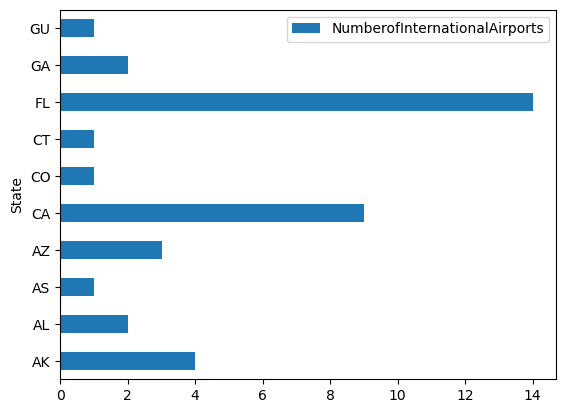

In [49]:
df2.plot(x="State", y="NumberofInternationalAirports", kind="barh")

In [17]:
data = pd.read_csv('C:\\Users\\aajos\\OneDrive\\Documents\\Capgemini Training\\Sprint Topics\\AirlinesAnalysis\\Airlines Analysis\\Airlines Source Data\\Flight_data.csv')
df3 = pd.DataFrame(data)
display(df3)

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL
0,AS,98,N407AS,ANC,SEA,5,430
1,AA,2336,N3KUAA,LAX,PBI,10,750
2,US,840,N171US,SFO,CLT,20,806
3,AA,258,N3HYAA,LAX,MIA,20,805
4,AS,135,N527AS,SEA,ANC,25,320
...,...,...,...,...,...,...,...
995,WN,552,N291WN,SAT,ELP,705,740
996,WN,3239,N905WN,TPA,BWI,705,925
997,WN,1912,N554WN,TUS,DEN,705,855
998,UA,1660,N17730,SNA,EWR,705,1524


In [33]:
data2 = data.head(20)

In [37]:
df4 = pd.DataFrame(data2)
display(df4)

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL
0,AS,98,N407AS,ANC,SEA,5,430
1,AA,2336,N3KUAA,LAX,PBI,10,750
2,US,840,N171US,SFO,CLT,20,806
3,AA,258,N3HYAA,LAX,MIA,20,805
4,AS,135,N527AS,SEA,ANC,25,320
5,DL,806,N3730B,SFO,MSP,25,602
6,NK,612,N635NK,LAS,MSP,25,526
7,US,2013,N584UW,LAX,CLT,30,803
8,AA,1112,N3LAAA,SFO,DFW,30,545
9,DL,1173,N826DN,LAS,ATL,30,711


<AxesSubplot:xlabel='FLIGHT_NUMBER', ylabel='SCHEDULED_ARRIVAL'>

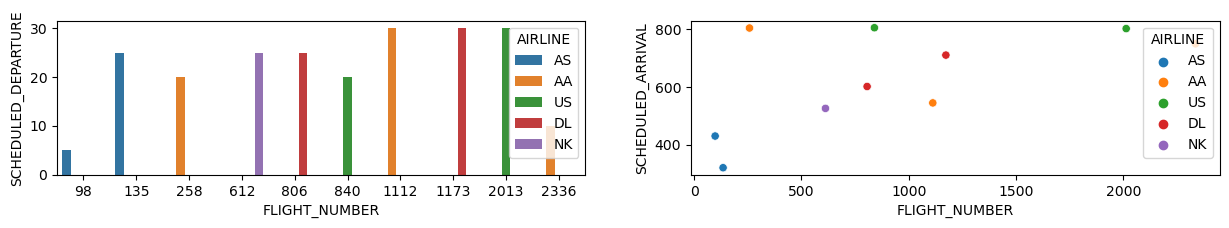

In [41]:
fig, axs = plt.subplots(ncols=2, figsize=(15,2))
sns.barplot(x="FLIGHT_NUMBER", y="SCHEDULED_DEPARTURE", hue="AIRLINE", data=data2, ax=axs[0])
sns.scatterplot(x="FLIGHT_NUMBER", y="SCHEDULED_ARRIVAL", hue="AIRLINE", data=data2, ax=axs[1])
